# Customer Churn Analysis

This notebook analyzes a telecom customer churn dataset. We will clean the data, explore key features, and visualize trends that may impact churn. The goal is to uncover insights about factors contributing to customer churn.


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/Customer Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## **#replacing blanks with 0 as tenure is 0 and no total charges are recorded**

In [9]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
df['customerID'].duplicated().sum()

0

In [15]:
def conv(value):
  if value ==1:
    return "Yes"
  else:
    return "No"
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

convert 0 and 1 values of senior citizen to yes/no to make it easier to understand*


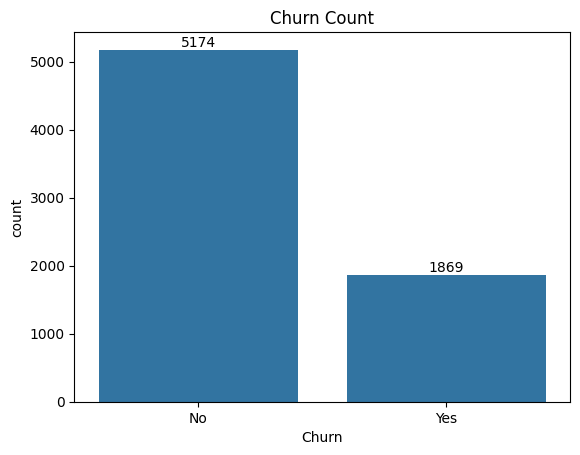

In [20]:
ax=sns.countplot(x='Churn',data=df)
ax.set_title('Churn Count')
ax.bar_label(ax.containers[0])
plt.show()

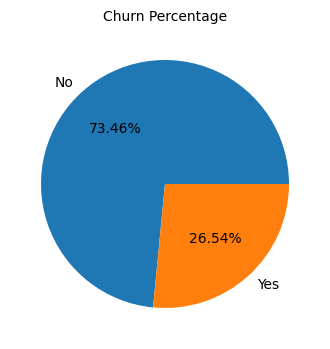

In [33]:
plt.figure(figsize=(4,5))
gb = df.groupby("Churn").agg({'Churn': "count"})
gb
plt.pie(gb['Churn'], labels=gb.index, autopct='%1.2f%%')
plt.title('Churn Percentage', fontsize=10)
plt.show()


1. from the given pie chart we can conclude that 26.54% of our customers have
  churned out
2. not let's explore the reason behind it

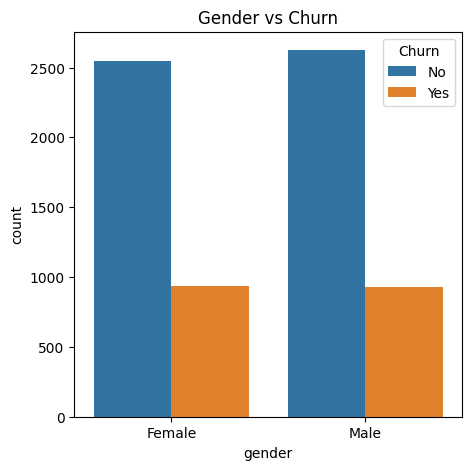

In [36]:
plt.figure(figsize=(5,5))
sns.countplot(x='gender',hue='Churn',data=df)
plt.title('Gender vs Churn')
plt.show()

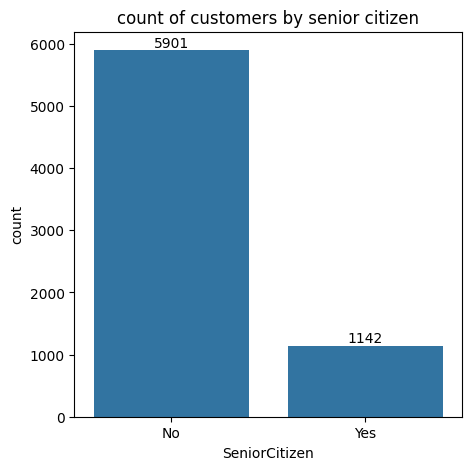

In [42]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x='SeniorCitizen',data=df)
ax.bar_label(ax.containers[0])
plt.title('count of customers by senior citizen')
plt.show()

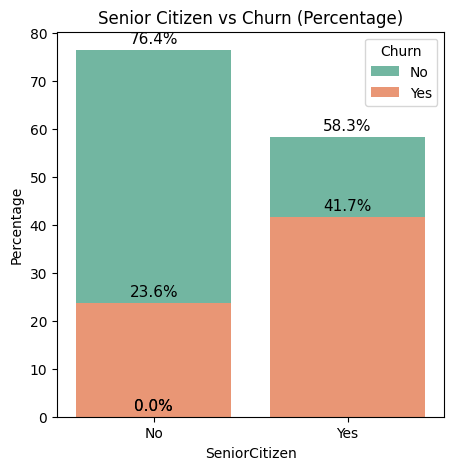

In [39]:
total = df.groupby('SeniorCitizen').size().reset_index(name='Total')
churn_count = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='Count')
merged = pd.merge(churn_count, total, on='SeniorCitizen')
merged['Percentage'] = merged['Count'] / merged['Total'] * 100

# Plotting
plt.figure(figsize=(5,5))
sns.barplot(x='SeniorCitizen', y='Percentage', hue='Churn', data=merged, dodge=False, palette='Set2')

# Adding percentage labels on bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}%',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 8),
                       textcoords='offset points')

# Title and labels
plt.title('Senior Citizen vs Churn (Percentage)')
plt.ylabel('Percentage')
plt.show()

comparative a greater percentage of people in senior citizen category have churned

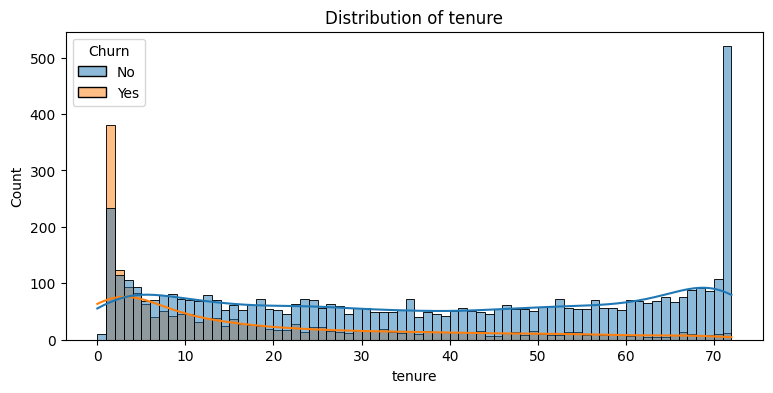

In [51]:
plt.figure(figsize=(9,4))
sns.histplot(x='tenure', data=df, bins=72, hue="Churn", kde=True)
plt.title('Distribution of tenure')
plt.show()

people who have used our services for a long time have stayed and people who have used our services #1 or 2 months have churned

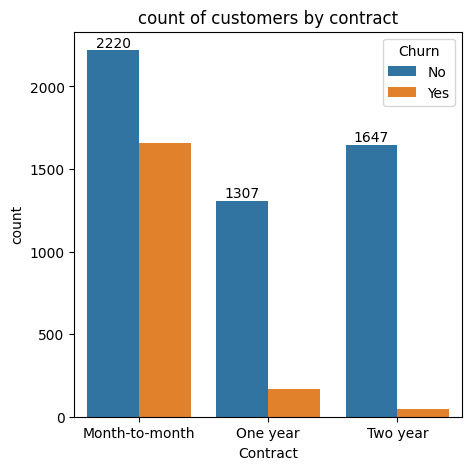

In [54]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x='Contract',data=df, hue ='Churn')
ax.bar_label(ax.containers[0])
plt.title('count of customers by contract')
plt.show()

people who have mouth to north convert are likely to churn then from those who have 1 or 2 years of contract

In [55]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

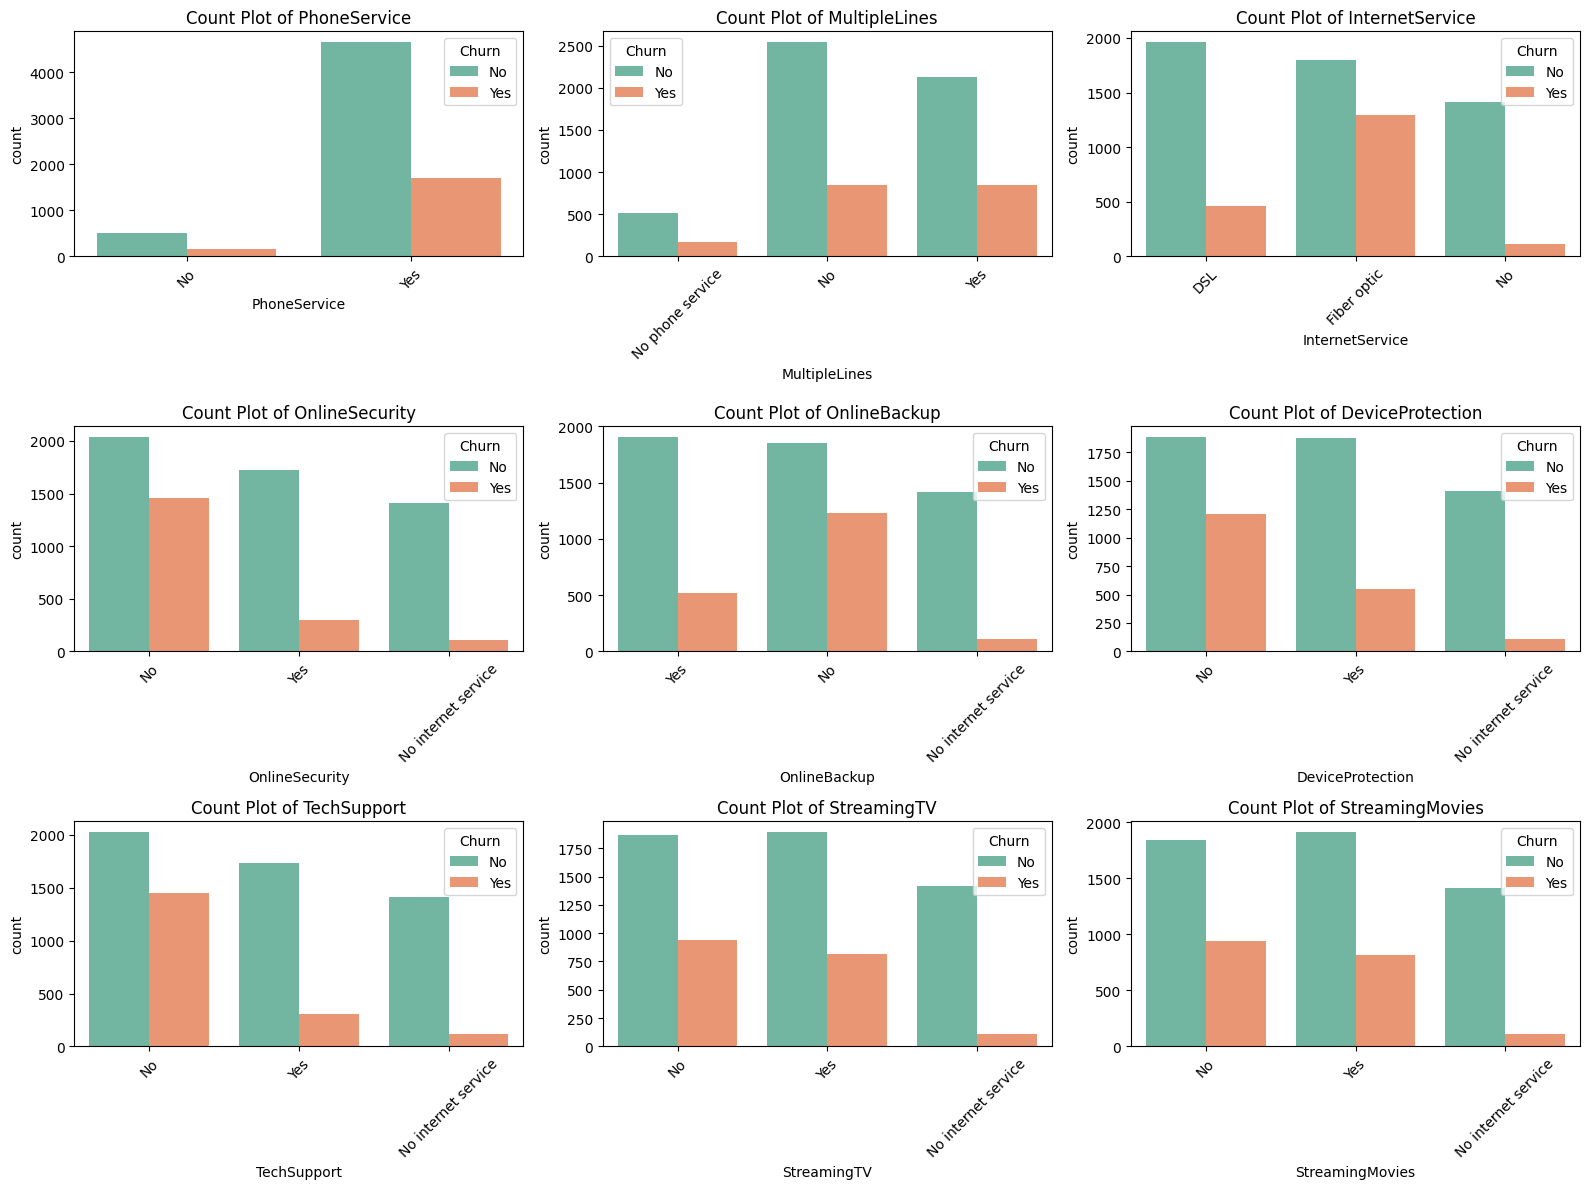

In [59]:
# List of columns
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Setting up the figure
plt.figure(figsize=(16, 12))

# Loop through the columns and create a countplot for each in a subplot
for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # 3 rows and 3 columns, 'i' keeps track of the position
    sns.countplot(x=column, data=df, palette='Set2', hue= 'Churn')
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=45)  # Rotate x labels for better readability

# Adjust layout
plt.tight_layout()
plt.show()

The subplots display count plots for several service-related columns, showing customer churn data. It’s clear that customers with no additional services (like Online Security, Backup, Device Protection, or Tech Support) tend to churn more often. Notably, fiber-optic internet services are also associated with higher churn rates compared to DSL. The general trend suggests that customers lacking bundled or value-added services may be more likely to leave.








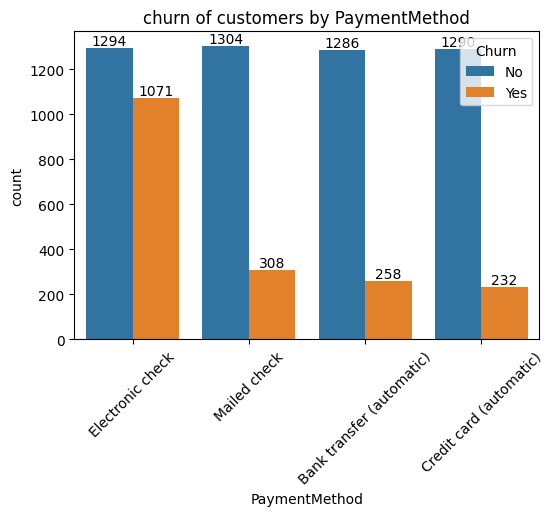

In [64]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='PaymentMethod', data=df, hue ='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('churn of customers by PaymentMethod')
plt.xticks(rotation=45)
plt.show()

customer is likely to churn when he is using electronic check as a payment method